In [1]:
import pandas as pd
import numpy as np
import os
from glob import glob
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [2]:
len(glob("res_tmp/*/*.csv"))

44963

In [78]:
len(glob("res_tmp/*/*.csv"))

44551

In [3]:
dfs = []
for file in tqdm(glob("res_tmp/*/*.csv")):
    df = pd.read_csv(file)
    dataset_name = file.split('/')[-1].split('|')[0]
    df['dataset'] = dataset_name
    if dataset_name in ['wine', 'ionosphere']:
        continue
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)

df_original = df.copy()

df

  0%|          | 0/44963 [00:00<?, ?it/s]

,max_depth,prune_useless_leaves,stump_selection,random_state,splitter,base_stumps,distance_measure,method,PartialPivotTreeStumpClassifier,train_time,...,precision_macro_val,precision_weighted_val,recall_score_val,recall_micro_val,recall_macro_val,recall_weighted_val,n_leaf_val,n_nodes_val,resulting_max_depth_val,dataset
0,3,True,best,42,best,['PartialPivotTreeStumpClassifier'],euclidean,SPT,"{'n_shapelets': 100, 'n_ts_for_selection': 0.1...",0.078726,...,0.705793,0.749001,0.744000,0.744000,0.703889,0.744000,6.4,5.4,4.0,vertebral
1,3,True,best,42,best,['PartialPivotTreeStumpClassifier'],euclidean,SPT,"{'n_shapelets': 100, 'n_ts_for_selection': 0.5...",0.669276,...,0.656845,0.696908,0.692000,0.692000,0.651111,0.692000,7.2,6.2,4.0,vertebral
2,3,True,best,42,best,['PartialPivotTreeStumpClassifier'],euclidean,SPT,"{'n_shapelets': 1000, 'n_ts_for_selection': 10...",0.382313,...,0.814610,0.838591,0.836000,0.836000,0.807778,0.836000,7.2,6.2,4.0,vertebral
3,3,True,best,42,best,['PartialPivotTreeStumpClassifier'],euclidean,SPT,"{'n_shapelets': 100, 'n_ts_for_selection': inf...",1.250720,...,0.674522,0.722311,0.716000,0.716000,0.671111,0.716000,7.0,6.0,4.0,vertebral
4,3,True,best,42,best,['PartialPivotTreeStumpClassifier'],euclidean,SPT,"{'n_shapelets': 100, 'n_ts_for_selection': 0.1...",0.001497,...,0.160000,0.230400,0.480000,0.480000,0.333333,0.480000,1.0,0.0,1.0,vertebral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42070,3,True,best,42,best,['PartialPivotTreeStumpClassifier'],euclidean,SPT,"{'n_shapelets': 10, 'n_ts_for_selection': 1000...",0.087941,...,0.885813,0.884897,0.864706,0.864706,0.865152,0.864706,6.0,5.0,4.0,seeds
42071,3,True,best,42,best,['PartialPivotTreeStumpClassifier'],euclidean,SPT,"{'n_shapelets': 100, 'n_ts_for_selection': 10,...",0.333653,...,0.879497,0.878868,0.864706,0.864706,0.865152,0.864706,5.0,4.0,4.0,seeds
42072,3,True,best,42,best,['PartialPivotTreeStumpClassifier'],euclidean,SPT,"{'n_shapelets': 10, 'n_ts_for_selection': inf,...",0.001566,...,0.107843,0.104671,0.323529,0.323529,0.333333,0.323529,1.0,0.0,1.0,seeds
42073,3,True,best,42,best,['PartialPivotTreeStumpClassifier'],euclidean,SPT,"{'n_shapelets': 10, 'n_ts_for_selection': 100,...",8.620382,...,0.854922,0.853277,0.847059,0.847059,0.846970,0.847059,6.6,5.6,4.0,seeds


In [4]:
df.dataset.unique()

array(['vertebral', 'glass', 'compass', 'auction', 'diabetes', 'titanic',
       'page', 'ecoli', 'home', 'magic', 'algerian', 'covertype',
       'bankMarketing', 'iris', 'seeds'], dtype=object)

In [5]:
#df.method = df.method.fillna('RT')

In [6]:
df.method.unique()

array(['SPT'], dtype=object)

In [7]:
df.columns

Index(['max_depth', 'prune_useless_leaves', 'stump_selection', 'random_state',
       'splitter', 'base_stumps', 'distance_measure', 'method',
       'PartialPivotTreeStumpClassifier', 'train_time', 'pred_time',
       'train_mem_MB', 'pred_mem_MB', 'accuracy_test',
       'balanced_accuracy_test', 'f1_score_test', 'f1_micro_test',
       'f1_macro_test', 'f1_weighted_test', 'precision_score_test',
       'precision_micro_test', 'precision_macro_test',
       'precision_weighted_test', 'recall_score_test', 'recall_micro_test',
       'recall_macro_test', 'recall_weighted_test', 'n_leaf_test',
       'n_nodes_test', 'resulting_max_depth_test', 'accuracy_val',
       'balanced_accuracy_val', 'f1_score_val', 'f1_micro_val', 'f1_macro_val',
       'f1_weighted_val', 'precision_score_val', 'precision_micro_val',
       'precision_macro_val', 'precision_weighted_val', 'recall_score_val',
       'recall_micro_val', 'recall_macro_val', 'recall_weighted_val',
       'n_leaf_val', 'n_nodes_val',

In [45]:
df['n_features_strategy'] = df.PartialPivotTreeStumpClassifier\
            .apply(lambda x: x[x.index('n_features_strategy')+22:].split(',')[0] if not pd.isna(x) else "")

df['selection'] = df.PartialPivotTreeStumpClassifier\
            .apply(lambda x: x[x.index('\'selection')+12:].split(',')[0] if not pd.isna(x) else "")


df['n_ts_for_selection'] = df.PartialPivotTreeStumpClassifier\
            .apply(lambda x: x[x.index('selection')+12:].split(',')[0] if not pd.isna(x) else "")


df['n_shapelets'] = df.PartialPivotTreeStumpClassifier\
            .apply(lambda x: x[x.index('n_shapelets')+14:].split(',')[0] if not pd.isna(x) else "")


df['scaler'] = df.PartialPivotTreeStumpClassifier\
            .apply(lambda x: x[x.index('scaler')+9:].split(',')[0] if not pd.isna(x) else "")


In [46]:
df.selection = df.selection.apply(lambda x: x.replace('_', ''))
df.n_features_strategy = df.n_features_strategy.apply(lambda x: x.replace('_', ''))
df.n_ts_for_selection = df.n_ts_for_selection.apply(lambda x: x.replace('_', ''))
df.n_shapelets = df.n_shapelets.apply(lambda x: x.replace('_', ''))
df.scaler = df.scaler.apply(lambda x: x.replace('_', '').replace('()', ''))

In [47]:
df['only_dataset'] = df.dataset.apply(lambda x: x.split('_')[0] if 'Scaler' in x else x)
#df['only_scaler'] = df.dataset.apply(lambda x: x.split('_')[-1] if 'Scaler' in x else 'None')

In [48]:
#df = df[df.method == 'SPT']

In [49]:
from aeon.visualisation import plot_critical_difference

df_aeon = df.sort_values(by=["dataset", 'f1_macro_val', 'n_features_strategy'], ascending=False)\
                .groupby(["only_dataset", "method", 'scaler']).head(1)

df_aeon = df_aeon.pivot(index=['only_dataset'], columns=['method', 'scaler'], values='f1_macro_test')

df_aeon.T.sort_index()

only_dataset           algerian   auction  bankMarketing   compass  covertype  \
method scaler                                                                   
SPT    MaxAbsScaler    0.958333  0.900582       0.751529  0.972138   0.739941   
       MinMaxScaler    0.937099  0.892691       0.772385  0.972138   0.739348   
       None            0.958333  0.870181       0.759850  0.972138   0.734834   
       RobustScaler    0.917508  0.798390       0.756549  0.972138   0.715909   
       StandardScaler  0.958333  0.870181       0.721872  0.972138   0.716392   

only_dataset           diabetes     ecoli     glass      home      iris  \
method scaler                                                             
SPT    MaxAbsScaler    0.701393  0.648754  0.554274  0.867333  0.932660   
       MinMaxScaler    0.639569  0.549110  0.538889  0.898482  0.864829   
       None            0.674517  0.391407  0.508632  0.878179  1.000000   
       RobustScaler    0.698525  0.472732  0.377564  0.918786  0.933333   
       StandardScaler  0.705571  0.641125  0.529573  0.878179  0.899749   

only_dataset              magic      page     seeds   titanic  vertebral  
method scaler                                                             
SPT    MaxAbsScaler    0.536530  0.650137  0.803785  0.798650   0.800472  
       MinMaxScaler    0.470657  0.643284  0.951370  0.727602   0.703321  
       None            0.667368  0.744387  0.927742  0.769429   0.791966  
       RobustScaler    0.732036  0.766755  0.831914  0.660089   0.711347  
       StandardScaler  0.762741  0.658296  0.810998  0.790254   0.730761

In [50]:
df_aeon = df.sort_values(by=["dataset", 'f1_macro_val', 'n_features_strategy'], ascending=False)\
                .groupby(["only_dataset", "method", 'scaler']).head(1)

df_aeon = df_aeon.pivot(index=['method', 'only_dataset'], columns=['scaler'], values='f1_macro_test')

df_aeon.sort_index()

scaler                MaxAbsScaler  MinMaxScaler      None  RobustScaler  \
method only_dataset                                                        
SPT    algerian           0.958333      0.937099  0.958333      0.917508   
       auction            0.900582      0.892691  0.870181      0.798390   
       bankMarketing      0.751529      0.772385  0.759850      0.756549   
       compass            0.972138      0.972138  0.972138      0.972138   
       covertype          0.739941      0.739348  0.734834      0.715909   
       diabetes           0.701393      0.639569  0.674517      0.698525   
       ecoli              0.648754      0.549110  0.391407      0.472732   
       glass              0.554274      0.538889  0.508632      0.377564   
       home               0.867333      0.898482  0.878179      0.918786   
       iris               0.932660      0.864829  1.000000      0.933333   
       magic              0.536530      0.470657  0.667368      0.732036   
       page               0.650137      0.643284  0.744387      0.766755   
       seeds              0.803785      0.951370  0.927742      0.831914   
       titanic            0.798650      0.727602  0.769429      0.660089   
       vertebral          0.800472      0.703321  0.791966      0.711347   

scaler                StandardScaler  
method only_dataset                   
SPT    algerian             0.958333  
       auction              0.870181  
       bankMarketing        0.721872  
       compass              0.972138  
       covertype            0.716392  
       diabetes             0.705571  
       ecoli                0.641125  
       glass                0.529573  
       home                 0.878179  
       iris                 0.899749  
       magic                0.762741  
       page                 0.658296  
       seeds                0.810998  
       titanic              0.790254  
       vertebral            0.730761

In [51]:
df_aeon.dropna()

scaler                MaxAbsScaler  MinMaxScaler      None  RobustScaler  \
method only_dataset                                                        
SPT    algerian           0.958333      0.937099  0.958333      0.917508   
       auction            0.900582      0.892691  0.870181      0.798390   
       bankMarketing      0.751529      0.772385  0.759850      0.756549   
       compass            0.972138      0.972138  0.972138      0.972138   
       covertype          0.739941      0.739348  0.734834      0.715909   
       diabetes           0.701393      0.639569  0.674517      0.698525   
       ecoli              0.648754      0.549110  0.391407      0.472732   
       glass              0.554274      0.538889  0.508632      0.377564   
       home               0.867333      0.898482  0.878179      0.918786   
       iris               0.932660      0.864829  1.000000      0.933333   
       magic              0.536530      0.470657  0.667368      0.732036   
       page               0.650137      0.643284  0.744387      0.766755   
       seeds              0.803785      0.951370  0.927742      0.831914   
       titanic            0.798650      0.727602  0.769429      0.660089   
       vertebral          0.800472      0.703321  0.791966      0.711347   

scaler                StandardScaler  
method only_dataset                   
SPT    algerian             0.958333  
       auction              0.870181  
       bankMarketing        0.721872  
       compass              0.972138  
       covertype            0.716392  
       diabetes             0.705571  
       ecoli                0.641125  
       glass                0.529573  
       home                 0.878179  
       iris                 0.899749  
       magic                0.762741  
       page                 0.658296  
       seeds                0.810998  
       titanic              0.790254  
       vertebral            0.730761

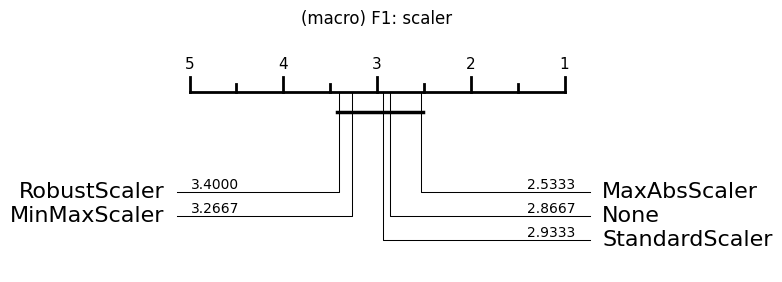

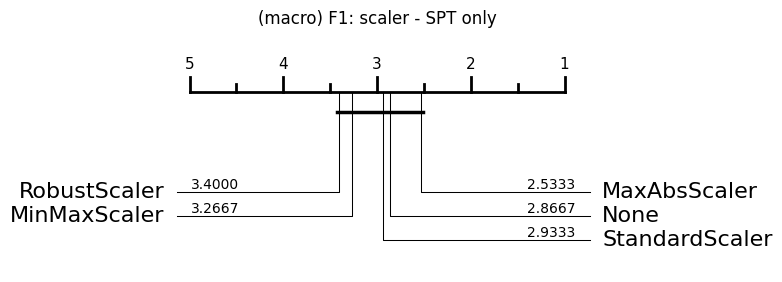

"PSPT_index = ['PSPT' in x for x in df_aeon.index]\nplot_critical_difference(df_aeon[PSPT_index].values, labels=df_aeon[PSPT_index].columns, lower_better=False, alpha=.1, test='nemenyi')\nplt.title('(macro) F1: scaler - PSPT only')\nplt.show()"

In [52]:
df_aeon.dropna(inplace=True)

df_aeon.index = ['_'.join(x) for x in df_aeon.index]

plot_critical_difference(df_aeon.values, labels=df_aeon.columns, lower_better=False, alpha=.1, test='nemenyi')
plt.title('(macro) F1: scaler')
plt.show()

SPT_index = ['PSPT' not in x for x in df_aeon.index]
plot_critical_difference(df_aeon[SPT_index].values, labels=df_aeon[SPT_index].columns, lower_better=False, alpha=.1, test='nemenyi')
plt.title('(macro) F1: scaler - SPT only')
plt.show()

"""PSPT_index = ['PSPT' in x for x in df_aeon.index]
plot_critical_difference(df_aeon[PSPT_index].values, labels=df_aeon[PSPT_index].columns, lower_better=False, alpha=.1, test='nemenyi')
plt.title('(macro) F1: scaler - PSPT only')
plt.show()"""

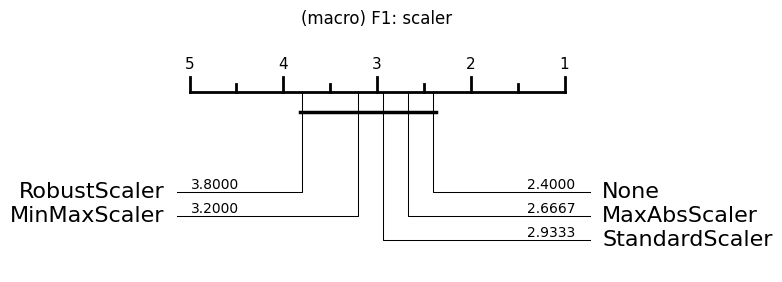

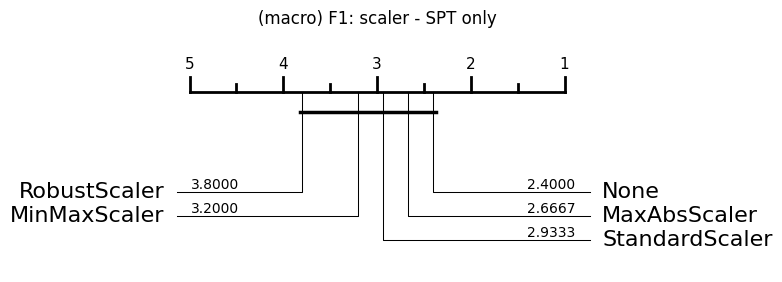

"PSPT_index = ['PSPT' in x for x in df_aeon.index]\nplot_critical_difference(df_aeon[PSPT_index].values, labels=df_aeon[PSPT_index].columns, lower_better=False, alpha=.1, test='nemenyi')\nplt.title('(macro) F1: scaler - PSPT only')\nplt.show()"

In [40]:
df_aeon = df.sort_values(by=["dataset", 'f1_macro_val', 'n_features_strategy'], ascending=False)\
                .groupby(["only_dataset", "method", 'scaler']).head(1)

df_aeon = df_aeon.pivot(index=['method', 'only_dataset'], columns=['scaler'], values='train_time')

df_aeon.dropna(inplace=True)

df_aeon.index = ['_'.join(x) for x in df_aeon.index]

plot_critical_difference(df_aeon.values, labels=df_aeon.columns, lower_better=False, alpha=.1, test='nemenyi')
plt.title('(macro) F1: scaler')
plt.show()

SPT_index = ['PSPT' not in x for x in df_aeon.index]
plot_critical_difference(df_aeon[SPT_index].values, labels=df_aeon[SPT_index].columns, lower_better=False, alpha=.1, test='nemenyi')
plt.title('(macro) F1: scaler - SPT only')
plt.show()

"""PSPT_index = ['PSPT' in x for x in df_aeon.index]
plot_critical_difference(df_aeon[PSPT_index].values, labels=df_aeon[PSPT_index].columns, lower_better=False, alpha=.1, test='nemenyi')
plt.title('(macro) F1: scaler - PSPT only')
plt.show()"""

only_dataset,algerian,auction,bankMarketing,compass,covertype,diabetes,ecoli,glass,home,iris,magic,page,seeds,titanic,vertebral
SPT_ 'all',0.958333,0.870181,0.759615,0.972138,0.722415,0.689327,0.680117,0.393162,0.878179,0.93266,0.671825,0.746306,0.873056,0.730569,0.766692
SPT_ 'cluster',0.958333,0.870181,0.721872,0.972138,0.739348,0.683084,0.549110,0.355839,0.898482,1.00000,0.762741,0.643284,0.810998,0.790254,0.730761
SPT_ 'random',0.937099,0.870181,0.772385,0.972138,0.716392,0.639569,0.391407,0.529573,0.877778,0.93266,0.598437,0.683056,0.927742,0.727602,0.791966


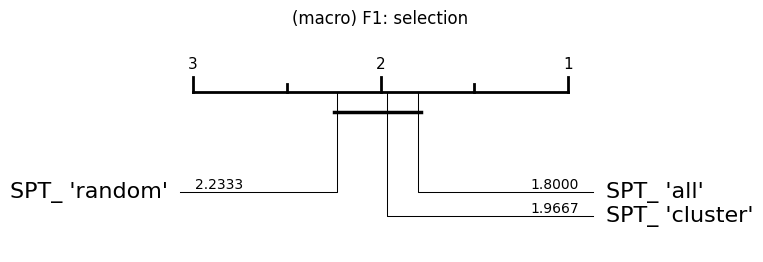

In [43]:
df_aeon = df[df.scaler.isin(['None', 'StandardScaler', 'MinMaxScaler'])]\
                .sort_values(by=["dataset", "method", 'f1_macro_val',], ascending=False)\
                .groupby(["only_dataset", "method", 'selection']).head(1)

df_aeon = df_aeon.pivot(index=['only_dataset'], columns=['method', 'selection'], values='f1_macro_test')

df_aeon.columns = ['_'.join(x) for x in df_aeon.columns]

display(df_aeon.T.sort_index())

df_aeon.dropna(inplace=True)

plot_critical_difference(df_aeon.values, labels=df_aeon.columns, lower_better=False, alpha=.1, test='nemenyi')
plt.title('(macro) F1: selection')
plt.show()

only_dataset,algerian,auction,bankMarketing,compass,covertype,diabetes,ecoli,glass,home,iris,magic,page,seeds,titanic,vertebral
SPT_ 'all',4.444362,0.929163,32.050159,2.243932,1.337079,9.523245,1.786074,5.261885,2.756557,4.898974,2.488167,407.923570,0.274275,11.586994,10.224005
SPT_ 'cluster',28.915244,21.517263,202.513142,887.986918,53.091334,0.478645,0.437669,119.732620,1.201546,0.130856,0.779022,113.856599,7.479348,0.141985,12.224224
SPT_ 'random',2.973450,0.504816,2.509918,2.084208,0.159072,0.618985,0.039192,9.710656,0.386674,0.055969,7.414263,19.883675,7.222017,11.999057,10.175514


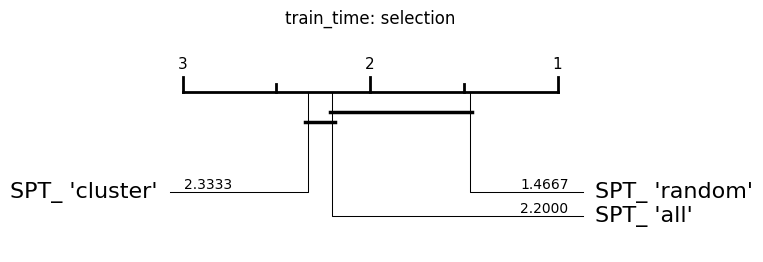

In [27]:
df_aeon = df[df.scaler.isin(['None', 'StandardScaler', 'MaxAbsScaler'])]\
                .sort_values(by=["dataset", "method", 'f1_macro_val',], ascending=False)\
                .groupby(["only_dataset", "method", 'selection']).head(1)

df_aeon = df_aeon.pivot(index=['only_dataset'], columns=['method', 'selection'], values='train_time')
df_aeon.columns = ['_'.join(x) for x in df_aeon.columns]
display(df_aeon.T.sort_index())

df_aeon.dropna(inplace=True)

plot_critical_difference(df_aeon.values, labels=df_aeon.columns, lower_better=True, alpha=.1, test='nemenyi')
plt.title('train_time: selection')
plt.show()

only_dataset,algerian,auction,bankMarketing,compass,covertype,diabetes,ecoli,glass,home,iris,magic,page,seeds,titanic,vertebral
SPT_'drop',0.958333,0.911872,0.726431,0.972138,0.734834,0.674517,0.637882,0.319409,0.856818,0.932660,0.473830,0.683056,0.927742,0.732436,0.691980
SPT_'elbow',0.958333,0.900582,0.734940,0.972138,0.720823,0.674517,0.687702,0.424726,0.876661,0.933333,0.657821,0.658296,0.803785,0.742505,0.732320
SPT_'new',0.958333,0.872477,0.714822,0.972138,0.739941,0.705571,0.586283,0.529573,0.854289,0.932660,0.596529,0.746280,0.877266,0.798650,0.791966
SPT_1,0.896406,0.796743,0.706448,0.972138,0.716392,0.703846,0.391407,0.489344,0.846923,0.966583,0.567182,0.558086,0.902778,0.790254,0.685475
SPT_2,0.958333,0.870181,0.716719,0.972132,0.710019,0.701393,0.648754,0.450369,0.867333,0.932660,0.666259,0.650137,0.810998,0.698944,0.720431
SPT_3,0.958333,0.900122,0.721872,0.972138,0.714701,0.717456,0.641125,0.554274,0.898148,1.000000,0.762741,0.556960,0.900692,0.723433,0.776264
SPT_4,0.937844,0.604310,0.751529,0.972138,0.729757,0.651584,0.748214,0.485043,0.878179,NaN,0.536530,0.651925,0.873056,0.773968,0.739179
SPT_5,0.896406,0.628698,0.764151,0.972138,0.698303,0.689327,0.683340,0.440467,0.887744,NaN,0.526917,0.628150,0.874375,0.769429,0.691501


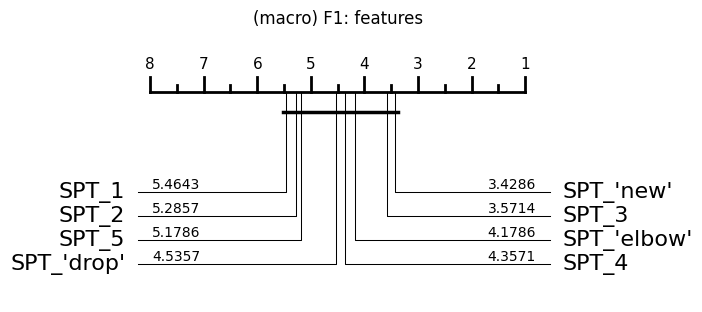

In [30]:
df_aeon = df[df.scaler.isin(['None', 'StandardScaler', 'MaxAbsScaler'])]\
                .sort_values(by=["dataset", "method", 'f1_macro_val',], ascending=False)\
                .groupby(["only_dataset", "method", 'n_features_strategy']).head(1)

df_aeon = df_aeon.pivot(index=['only_dataset'], columns=['method', 'n_features_strategy'], values='f1_macro_test')
df_aeon.columns = ['_'.join(x) for x in df_aeon.columns]
display(df_aeon.T.sort_index())

df_aeon.dropna(inplace=True)

plot_critical_difference(df_aeon.values, labels=df_aeon.columns, lower_better=False, alpha=.1, test='nemenyi')

plt.title('(macro) F1: features')
plt.show()

only_dataset,algerian,auction,bankMarketing,compass,covertype,diabetes,ecoli,glass,home,iris,magic,page,seeds,titanic,vertebral
SPT_'drop',4.278188,12.779561,18.059647,9.338482,21.439067,12.146246,11.307761,8.459924,11.355323,4.865624,10.830049,19.883675,7.222017,11.586994,11.908250
SPT_'elbow',4.444362,22.345577,25.408758,15.358951,12.697237,12.789269,10.567968,10.541897,11.026839,6.596032,7.171340,113.856599,7.479348,11.763330,10.764409
SPT_'new',28.915244,10.610186,21.168334,5.813770,53.091334,16.068409,11.182151,9.710656,19.417056,5.296970,9.954675,225.357232,8.392818,11.999057,10.175514
SPT_1,0.047136,0.275801,0.073212,11.736207,0.159072,0.125962,0.039192,0.163642,0.125490,0.019667,1.275234,1.274145,0.111432,0.141985,0.056048
SPT_2,15.706414,21.517263,2.573695,2.084208,0.643577,0.478645,0.437669,2.289528,0.386674,0.055969,0.446102,407.923570,0.349697,0.549603,0.086055
SPT_3,8.024547,1.850952,204.083871,15.016171,350.836121,0.618985,0.572168,0.238872,1.201546,0.130856,0.765698,1315.171978,0.516201,7.366512,1.167948
SPT_4,12.587983,25.074291,2.509918,18.513653,393.031001,0.182845,0.587053,80.580748,2.756557,NaN,0.779022,2376.845429,0.274275,0.592375,2.508285
SPT_5,208.926184,3.130476,32.050159,887.986918,179.630225,9.523245,2.075307,1.932991,1.915378,NaN,4.982720,2694.341186,0.103102,0.290536,0.155031


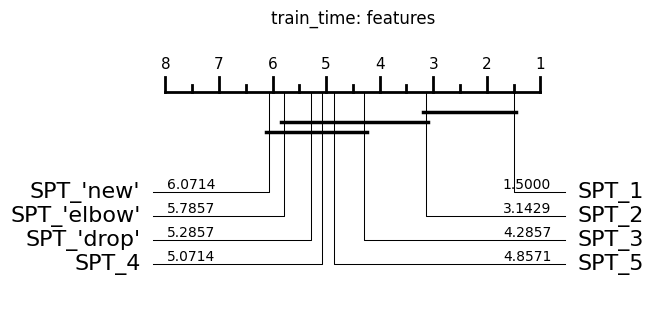

In [31]:
df_aeon = df[df.scaler.isin(['None', 'StandardScaler', 'MaxAbsScaler'])]\
                .sort_values(by=["dataset", "method", 'f1_macro_val',], ascending=False)\
                .groupby(["only_dataset", "method", 'n_features_strategy']).head(1)

df_aeon = df_aeon.pivot(index=['only_dataset'], columns=['method', 'n_features_strategy'], values='train_time')
df_aeon.columns = ['_'.join(x) for x in df_aeon.columns]
display(df_aeon.T.sort_index())

df_aeon.dropna(inplace=True)

plot_critical_difference(df_aeon.values, labels=df_aeon.columns, lower_better=True, alpha=.1, test='nemenyi')

plt.title('train_time: features')
plt.show()

only_dataset,algerian,auction,bankMarketing,compass,covertype,diabetes,ecoli,glass,home,iris,magic,page,seeds,titanic,vertebral
SPT_0.1,0.958333,0.892691,0.759398,0.972138,0.700205,0.674517,0.443145,0.399878,0.898148,0.899749,0.678445,0.741115,0.877266,0.732436,0.758686
SPT_0.5,0.958333,0.870181,0.741139,0.972132,0.709739,0.668999,0.641125,0.319409,0.867333,1.000000,0.609382,0.634251,0.900692,0.742505,0.732320
SPT_10,0.979033,0.870181,0.729660,0.972138,0.716392,0.701393,0.590862,0.440467,0.790254,0.933333,0.619048,0.558086,0.927742,0.747989,0.625170
SPT_100,0.958333,0.870181,0.759513,0.972138,0.701333,0.674517,0.689571,0.529573,0.854289,1.000000,0.464836,0.501098,0.877395,0.723433,0.810068
SPT_1000,0.958333,0.870181,0.764287,0.972138,0.739941,0.689327,0.686473,0.508632,0.878179,0.966583,0.536530,0.728884,0.906105,0.769429,0.730761
SPT_inf,0.958333,0.870181,0.751529,0.972138,0.731761,0.629808,0.648754,0.700286,0.878179,0.899749,0.658506,0.650137,0.874375,0.798650,0.791966


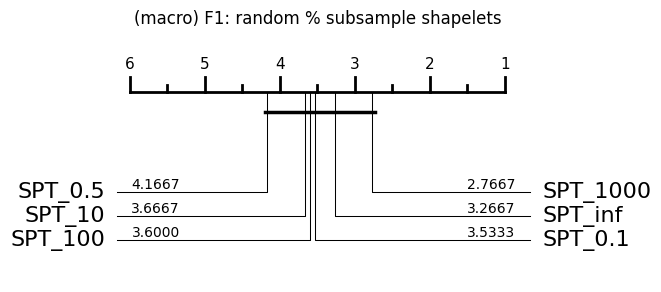

In [32]:
df_aeon = df[df.scaler.isin(['None', 'StandardScaler', 'MaxAbsScaler'])]\
                .sort_values(by=["dataset", "method", 'f1_macro_val',], ascending=False)\
                .groupby(["only_dataset", "method", 'n_ts_for_selection']).head(1)

df_aeon = df_aeon.pivot(index=['only_dataset'], columns=['method', 'n_ts_for_selection'], values='f1_macro_test')
df_aeon.columns = ['_'.join(x) for x in df_aeon.columns]
display(df_aeon.T.sort_index())

df_aeon.dropna(inplace=True)

plot_critical_difference(df_aeon.values, labels=df_aeon.columns, lower_better=False, alpha=.1, test='nemenyi')
plt.title('(macro) F1: random % subsample shapelets')
plt.show()

only_dataset,algerian,auction,bankMarketing,compass,covertype,diabetes,ecoli,glass,home,iris,magic,page,seeds,titanic,vertebral
SPT_0.1,4.444362,1.015931,3.162704,887.986918,1.246985,12.789269,0.040926,142.947514,1.201546,5.178929,0.325485,88.805230,8.392818,11.586994,9.420037
SPT_0.5,2.973450,13.247875,202.513142,2.084208,1.174604,0.206433,0.572168,8.459924,0.386674,0.130856,0.631567,288.707869,3.925687,11.763330,10.764409
SPT_10,7.815882,0.393181,0.443545,1.821436,0.159072,0.478645,0.143120,1.932991,0.111517,6.596032,0.551029,1.274145,7.222017,0.138135,9.737474
SPT_100,28.915244,0.929163,5.748368,5.813770,1.494161,12.146246,4.413016,9.710656,19.417056,0.276287,0.582819,14.494160,0.092919,7.366512,10.190162
SPT_1000,5.888694,18.748855,27.846997,1246.848032,53.091334,9.523245,0.108485,11.065061,2.756557,0.019667,0.779022,226.265954,0.069112,0.290536,12.224224
SPT_inf,8.024547,21.517263,2.509918,15.016171,21.812423,5.599913,0.437669,14.590102,2.778864,5.269946,7.414263,407.923570,0.103102,11.999057,10.175514


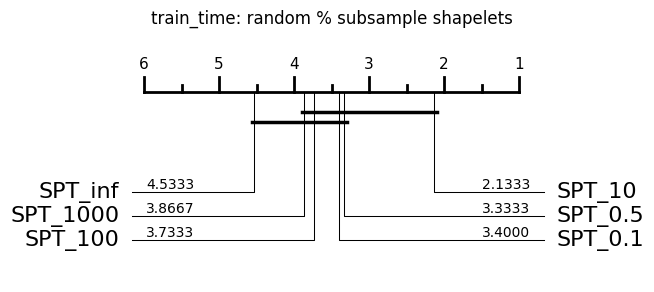

In [33]:
df_aeon = df[df.scaler.isin(['None', 'StandardScaler', 'MaxAbsScaler'])]\
                .sort_values(by=["dataset", "method", 'f1_macro_val',], ascending=False)\
                .groupby(["only_dataset", "method", 'n_ts_for_selection']).head(1)

df_aeon = df_aeon.pivot(index=['only_dataset'], columns=['method', 'n_ts_for_selection'], values='train_time')
df_aeon.columns = ['_'.join(x) for x in df_aeon.columns]
display(df_aeon.T.sort_index())

df_aeon.dropna(inplace=True)

plot_critical_difference(df_aeon.values, labels=df_aeon.columns, lower_better=True, alpha=.1, test='nemenyi')
plt.title('train_time: random % subsample shapelets')
plt.show()

only_dataset,algerian,auction,bankMarketing,compass,covertype,diabetes,ecoli,glass,home,iris,magic,page,seeds,titanic,vertebral
SPT_10,0.958333,0.843746,0.710981,0.972138,0.700205,0.674517,0.648754,0.700286,0.876661,0.933333,0.536530,0.676076,0.810998,0.798650,0.744061
SPT_100,0.958333,0.886860,0.752486,0.972138,0.739941,0.701393,0.664413,0.529573,0.868472,1.000000,0.596529,0.658296,0.877266,0.769429,0.791966
SPT_1000,0.958333,0.870181,0.751529,0.972138,0.716392,0.717456,0.590862,0.557864,0.867333,1.000000,0.667368,0.628526,0.927742,0.724230,0.800472
SPT_inf,0.958333,0.870181,0.764151,0.971439,0.717102,0.689327,0.680117,0.393162,0.878179,0.899749,0.671825,0.650137,0.873056,0.732436,0.766692


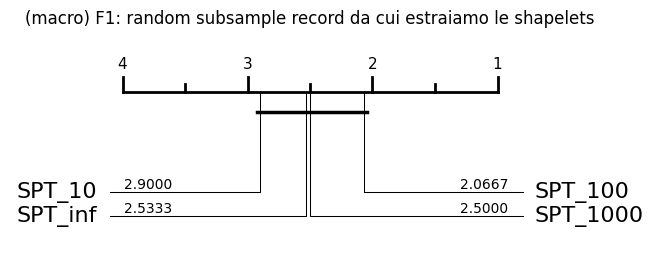

In [37]:
df_aeon = df[(df.method == 'SPT') & df.scaler.isin(['None', 'MaxAbsScaler', 'StandardScaler'])]\
                .sort_values(by=["dataset", "method", 'f1_macro_val',], ascending=False)\
                .groupby(["only_dataset", "method", 'n_shapelets']).head(1)

df_aeon = df_aeon.pivot(index=['only_dataset'], columns=['method', 'n_shapelets'], values='f1_macro_test')
df_aeon.columns = ['_'.join(x) for x in df_aeon.columns]
display(df_aeon.T.sort_index())

df_aeon.dropna(inplace=True)

plot_critical_difference(df_aeon.values, labels=df_aeon.columns, lower_better=False, alpha=.1, test='nemenyi')
plt.title('(macro) F1: random subsample record da cui estraiamo le shapelets')
plt.show()

only_dataset,algerian,auction,bankMarketing,compass,covertype,diabetes,ecoli,glass,home,iris,magic,page,seeds,titanic,vertebral
SPT_10,4.278188,12.132404,0.179636,887.986918,1.246985,12.146246,0.437669,14.590102,12.114859,6.596032,0.779022,29.591660,0.349697,11.999057,10.361324
SPT_100,28.915244,13.985168,0.364613,7.068232,53.091334,0.478645,0.122370,9.710656,0.120657,0.130856,9.954675,113.856599,8.392818,0.290536,10.175514
SPT_1000,2.973450,21.517263,2.509918,6.303799,0.159072,0.618985,0.143120,119.732620,0.386674,0.276287,4.550460,590.321150,7.222017,13.427434,10.707317
SPT_inf,4.444362,0.929163,32.050159,2.243932,1.337079,9.523245,1.786074,5.261885,2.756557,4.898974,2.488167,407.923570,0.274275,11.586994,10.224005


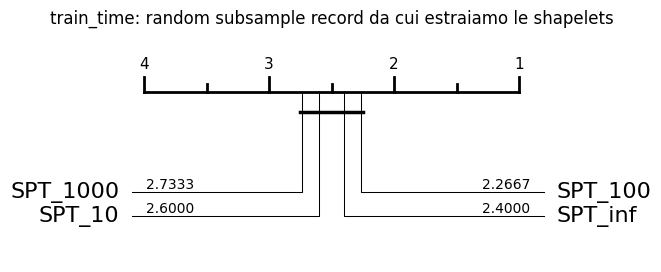

In [38]:
df_aeon = df[(df.method == 'SPT') & df.scaler.isin(['None', 'MaxAbsScaler', 'StandardScaler'])]\
                .sort_values(by=["dataset", "method", 'f1_macro_val',], ascending=False)\
                .groupby(["only_dataset", "method", 'n_shapelets']).head(1)

df_aeon = df_aeon.pivot(index=['only_dataset'], columns=['method', 'n_shapelets'], values='train_time')
df_aeon.columns = ['_'.join([str(_x) for _x in x]) for x in df_aeon.columns]
display(df_aeon.T.sort_index())

df_aeon.dropna(inplace=True)

plot_critical_difference(df_aeon.values, labels=df_aeon.columns, lower_better=True, alpha=.1, test='nemenyi')
plt.title('train_time: random subsample record da cui estraiamo le shapelets')
plt.show()

In [36]:
df_aeon = df[df.scaler.isin(['None', 'MinMaxScaler', 'MaxAbsScaler'])]\
                .sort_values(by=["dataset", "method", 'f1_macro_val',], ascending=False)\
                .groupby(["only_dataset", "method"]).head(1)

df_aeon = df_aeon.pivot(index=['only_dataset'], columns=['method'], values=['max_depth', 'f1_macro_val'])

display(df_aeon.T.sort_index())

,only_dataset,algerian,auction,bankMarketing,compass,covertype,diabetes,ecoli,glass,home,iris,magic,page,seeds,titanic,vertebral
,method,,,,,,,,,,,,,,,
f1_macro_val,SPT,1.0,0.914017,0.796548,0.965576,0.721228,0.770432,0.614939,0.537414,0.926007,0.974967,0.592267,0.771234,0.906837,0.790687,0.796791
max_depth,SPT,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


only_dataset,algerian,auction,bankMarketing,compass,covertype,diabetes,ecoli,glass,home,iris,magic,page,seeds,titanic,vertebral
group,,,,,,,,,,,,,,,
'all'_inf,0.937099,0.870181,0.764003,NaN,0.722415,0.689327,0.685323,0.456624,0.878179,1.000000,0.687702,0.641509,0.927659,0.752420,0.797619
'cluster'_10,0.937099,0.805516,0.741321,0.972138,0.719150,0.672037,0.586283,0.434814,0.928828,0.932660,0.762741,0.676076,0.814103,0.750994,0.744061
'cluster'_100,0.958333,0.899195,0.764853,0.972138,0.734834,0.617077,0.590862,0.393338,0.817268,0.932660,0.526917,0.721176,0.904518,0.770671,0.730761
'cluster'_1000,0.958333,0.870181,0.736113,0.972138,0.712354,0.672037,0.699080,0.443298,0.908493,1.000000,0.693150,0.761000,0.821848,0.758485,0.739179
'random'_10,0.958333,0.843746,0.752313,0.972138,0.739766,0.706421,0.686473,0.424726,0.876661,0.966583,0.529227,0.602740,0.847092,0.753121,0.691980
'random'_100,0.895165,0.899195,0.688768,0.972138,0.733162,0.672037,0.664413,0.508632,0.856818,0.899749,0.664060,0.683056,0.821848,0.769429,0.685475
'random'_1000,0.958333,0.879336,0.720823,0.972138,0.732458,0.703846,0.691829,0.484596,0.877778,0.932660,0.664098,0.685774,0.761713,0.719113,0.746082


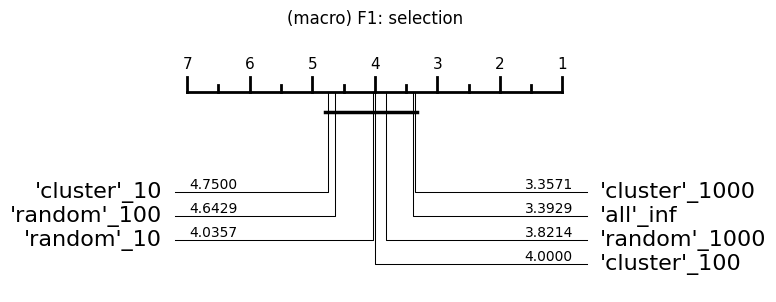

In [69]:
df["group"] = df[["selection", "n_shapelets"]].apply(lambda x: "_".join([f'{_x.strip()}' for _x in x]), axis=1)

to_exclude = ["'random'_inf", "'cluster'_inf", "'all'_1000", "'all'_100", "'all'_10"]

df_aeon = df[(~df.group.isin(to_exclude)) & (df.n_ts_for_selection.isin(["1000"])) & (df.method == 'SPT') & (df.scaler.isin(['None', 'MaxAbsScaler', 'StandardScaler']))]\
                .sort_values(by=["dataset", "method", 'f1_macro_val',], ascending=False)\
                .groupby(["only_dataset", "group", 'selection']).head(1)

df_aeon = df_aeon.pivot(index=['only_dataset'], columns=['group'], values='f1_macro_test')

display(df_aeon.T.sort_index())

df_aeon.dropna(inplace=True)

plot_critical_difference(df_aeon.values, labels=df_aeon.columns, lower_better=False, alpha=.1, test='nemenyi')
plt.title('(macro) F1: selection')
plt.show()

only_dataset,algerian,auction,bankMarketing,compass,covertype,diabetes,ecoli,glass,home,iris,magic,page,seeds,titanic,vertebral
group,,,,,,,,,,,,,,,
'all'_inf,3.554447,6.548255,58.327231,NaN,27.539510,9.523245,2.543003,8.116223,2.756557,0.062196,10.659359,179.537996,0.635309,14.185523,0.497138
'cluster'_10,5.551415,10.407455,0.946271,23.689071,41.216433,0.682460,11.182151,11.563115,12.740635,6.922953,0.765698,29.591660,0.256799,0.254780,10.494501
'cluster'_100,4.540275,12.192264,2.531428,93.620615,21.439067,5.744919,1.534052,79.054977,11.777166,5.236349,4.982720,29.715048,1.595179,2.837026,12.224224
'cluster'_1000,6.023711,18.748855,296.446234,1215.768011,44.142236,25.546538,74.805257,167.539707,4.683596,0.287219,78.946965,369.220250,29.273898,16.760841,2.508285
'random'_10,4.700127,12.132404,0.165870,7.710564,24.704563,0.200361,0.108485,10.541897,12.114859,0.019667,0.110418,20.342443,9.516881,12.327488,11.908250
'random'_100,0.438355,12.266905,0.352411,0.594092,0.232251,0.408112,0.122370,11.065061,11.355323,5.359869,9.027137,19.883675,0.106963,0.290536,10.382169
'random'_1000,3.334650,10.367617,3.053048,3.181517,27.774437,0.788724,0.778882,0.482871,0.595447,5.100935,0.786858,21.994441,0.285681,10.787066,10.544222


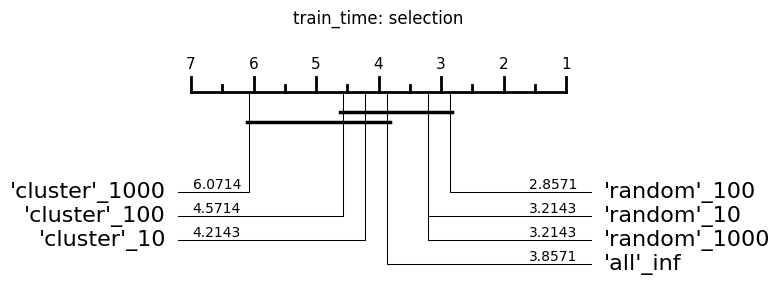

In [70]:
df["group"] = df[["selection", "n_shapelets"]].apply(lambda x: "_".join([f'{_x.strip()}' for _x in x]), axis=1)

df_aeon = df[(~df.group.isin(to_exclude)) & (df.n_ts_for_selection.isin(["1000"])) & (df.method == 'SPT') & (df.scaler.isin(['None', 'MinMaxScaler', 'StandardScaler']))]\
                .sort_values(by=["dataset", "method", 'f1_macro_val',], ascending=False)\
                .groupby(["only_dataset", "group", 'selection']).head(1)

df_aeon = df_aeon.pivot(index=['only_dataset'], columns=['group'], values='train_time')

display(df_aeon.T.sort_index())

df_aeon.dropna(inplace=True)

plot_critical_difference(df_aeon.values, labels=df_aeon.columns, lower_better=True, alpha=.1, test='nemenyi')
plt.title('train_time: selection')
plt.show()

In [71]:
df.resulting_max_depth_test

0        4
1        4
2        4
3        4
4        1
        ..
41609    4
41610    4
41611    1
41612    4
41613    4
Name: resulting_max_depth_test, Length: 41614, dtype: int64

only_dataset,algerian,auction,bankMarketing,compass,covertype,diabetes,ecoli,glass,home,iris,magic,page,seeds,titanic,vertebral
group,,,,,,,,,,,,,,,
0.1_'all'_inf,0.958333,0.892691,0.716719,NaN,0.717102,0.689327,0.631713,0.460266,0.846923,0.966583,0.678445,0.735088,0.902778,0.750188,0.703945
0.1_'cluster'_10,0.958333,0.787151,0.749775,0.972138,0.724607,0.610390,0.616676,0.352037,0.887744,0.899749,0.618617,0.656480,0.853816,0.790254,0.613889
0.1_'cluster'_100,0.958333,0.899195,0.727795,0.972138,0.718988,0.669157,0.497843,0.387115,0.888479,0.868170,0.590862,0.604947,0.900692,0.724413,0.776967
0.1_'cluster'_1000,0.958333,0.872477,0.752052,0.972138,0.709739,0.674517,0.590862,0.399878,0.898148,0.899749,0.590862,0.516273,0.873056,0.744633,0.721963
0.1_'random'_10,0.896406,0.773908,0.713597,0.972138,0.718196,0.599912,0.443145,0.399863,0.857407,0.932660,0.429942,0.603225,0.822401,0.756793,0.746082
0.1_'random'_100,0.958333,0.821443,0.748769,0.972138,0.713970,0.639569,0.540814,0.476660,0.876661,0.966583,0.698819,0.524590,0.902778,0.753121,0.614650
0.1_'random'_1000,0.958333,0.870181,0.738897,0.972138,0.715793,0.680618,0.677639,0.501056,0.877273,0.899749,0.718377,0.635909,0.801568,0.756220,0.685475
0.5_'all'_inf,0.958333,0.870181,0.722222,NaN,0.716563,0.671608,0.679790,0.565929,0.888479,0.933333,0.689571,0.744387,0.849926,0.769048,0.766692
0.5_'cluster'_10,0.958333,0.836922,0.660743,0.972138,0.732458,0.685714,0.641125,0.607143,0.908756,0.829497,0.657821,0.648587,0.855172,0.698944,0.744061


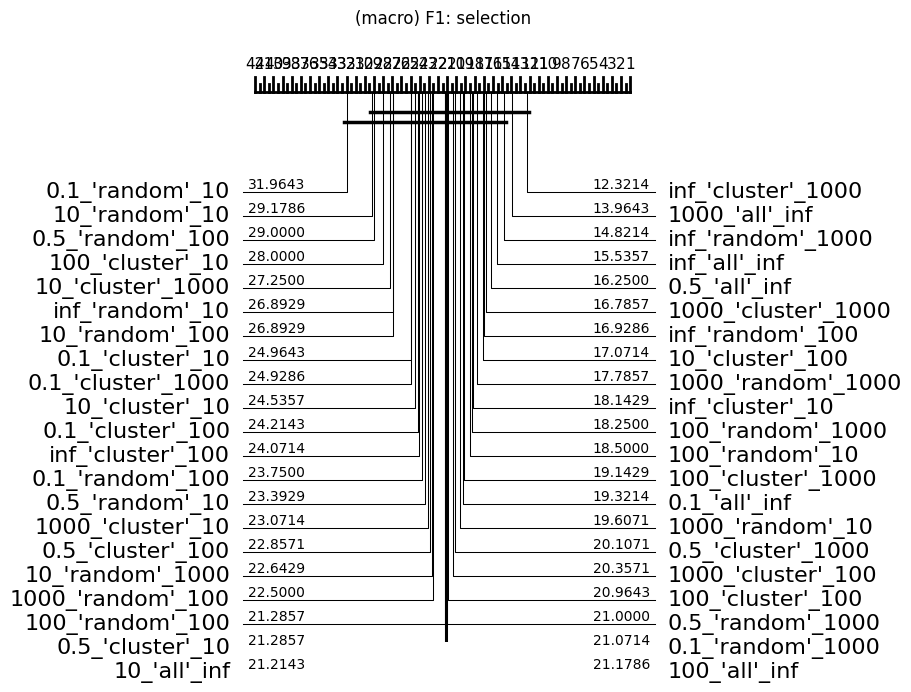

In [72]:
df["group"] = df[["n_ts_for_selection", "selection", "n_shapelets"]].apply(lambda x: "_".join([f'{_x.strip()}' for _x in x]), axis=1)

df_aeon = df[(df.method == 'SPT') & (df.scaler.isin(['None', 'MinMaxScaler', 'StandardScaler'])) & (df.resulting_max_depth_test > 1)]\
                .sort_values(by=["dataset", "method", 'f1_macro_val',], ascending=False)\
                .groupby(["only_dataset", "group", 'selection']).head(1)

df_aeon = df_aeon.pivot(index=['only_dataset'], columns=['group'], values='f1_macro_test')

display(df_aeon.T.sort_index())

df_aeon.dropna(inplace=True)

plot_critical_difference(df_aeon.values, labels=df_aeon.columns, lower_better=False, alpha=.1, test='nemenyi')
plt.title('(macro) F1: selection')
plt.show()

only_dataset,algerian,auction,bankMarketing,compass,covertype,diabetes,ecoli,glass,home,iris,magic,page,seeds,titanic,vertebral
group,,,,,,,,,,,,,,,
0.1_'all'_inf,0.179361,1.015931,2.573695,NaN,1.337079,1.171490,0.300835,0.642786,0.307323,6.803070,0.325485,61.335824,0.078840,0.375395,11.070714
0.1_'cluster'_10,7.575132,8.306797,0.158118,18.880677,19.066458,11.695445,0.472303,22.291710,11.703555,5.178929,0.481420,23.956337,1.040666,0.141985,9.823881
0.1_'cluster'_100,30.476990,10.307009,3.408400,9.338482,11.754450,10.563223,0.421526,48.926366,0.460590,4.737640,0.294053,165.738214,0.516201,1.671242,9.881541
0.1_'cluster'_1000,1.707600,2.325157,91.679965,18.663679,31.971889,12.789269,3.460882,142.947514,1.201546,4.883880,7.731936,305.890373,11.326460,12.013592,9.754878
0.1_'random'_10,0.047136,9.934458,0.115860,5.694540,10.635492,11.149330,0.040926,9.988488,11.445779,0.016240,0.064283,14.565140,0.059569,11.727422,10.041541
0.1_'random'_100,0.732403,10.243121,0.153286,7.694136,11.245477,0.178018,0.077773,0.316101,0.102251,0.024365,0.175509,14.777192,0.090867,0.196885,11.167804
0.1_'random'_1000,3.808656,0.527447,4.622500,1.480818,12.999974,0.607063,0.400872,0.280227,0.330705,0.022282,0.378618,15.728019,0.215503,11.598671,0.056048
0.5_'all'_inf,3.655456,4.672150,26.281045,NaN,20.024917,13.435991,0.940969,11.740870,0.832427,5.127003,0.897731,286.588611,0.388314,4.969661,10.224005
0.5_'cluster'_10,3.639779,11.279295,0.229793,74.731472,19.423906,0.558921,0.572168,11.399655,0.127516,0.051113,7.171340,47.157933,0.515055,0.549603,9.981186


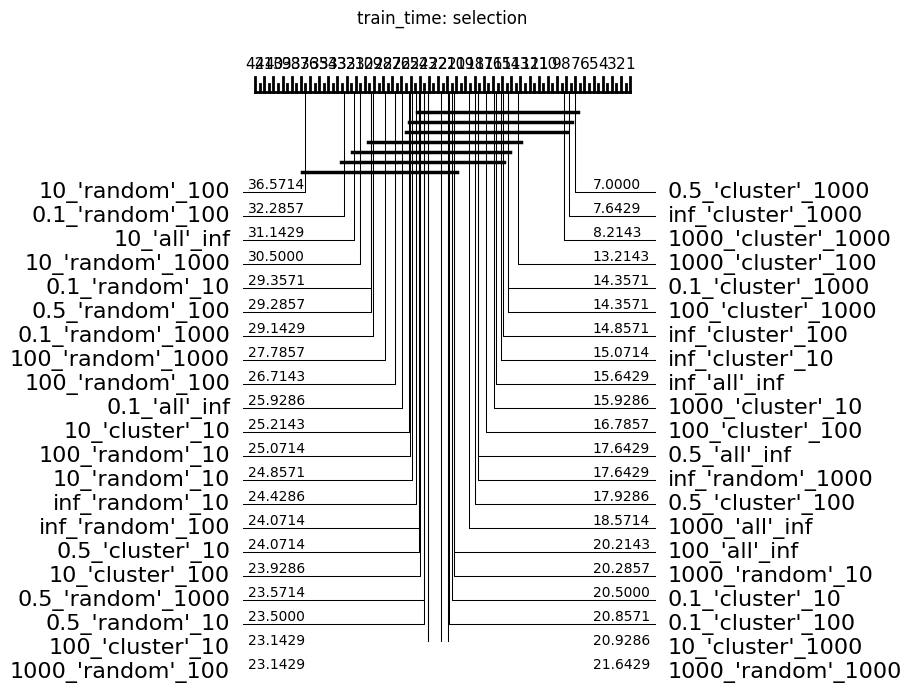

In [73]:
df["group"] = df[["n_ts_for_selection", "selection", "n_shapelets"]].apply(lambda x: "_".join([f'{_x.strip()}' for _x in x]), axis=1)

df_aeon = df[(df.method == 'SPT') & (df.scaler.isin(['None', 'MinMaxScaler', 'StandardScaler'])) & (df.resulting_max_depth_test > 1)]\
                .sort_values(by=["dataset", "method", 'f1_macro_val',], ascending=False)\
                .groupby(["only_dataset", "group", 'selection']).head(1)

df_aeon = df_aeon.pivot(index=['only_dataset'], columns=['group'], values='train_time')

display(df_aeon.T.sort_index())

df_aeon.dropna(inplace=True)

plot_critical_difference(df_aeon.values, labels=df_aeon.columns, lower_better=False, alpha=.1, test='nemenyi')
plt.title('train_time: selection')
plt.show()

only_dataset,algerian,auction,bankMarketing,covertype,diabetes,ecoli,glass,home,iris,magic,page,seeds,titanic,vertebral
group,,,,,,,,,,,,,,
'all'_inf_'drop',0.958333,0.855384,0.735914,0.722415,0.689038,0.530748,0.569597,0.827154,0.932660,0.614516,0.501098,0.735747,0.730569,0.772128
'all'_inf_'elbow',0.958333,0.872477,0.734940,0.720000,0.700971,0.675952,0.565929,0.867824,0.933333,0.687702,0.726250,0.792677,0.731956,0.746082
'all'_inf_'new',0.937099,0.879336,0.749241,0.722457,0.686384,0.679772,0.467779,0.865165,0.899749,0.687702,0.746280,0.902741,0.762851,0.766692
'all'_inf_1,0.979033,0.859932,0.728854,0.717102,0.593074,0.567182,0.412576,0.887744,0.966583,0.567182,0.624571,0.854823,0.790254,0.685475
'all'_inf_2,0.958333,0.870181,0.716719,0.721998,0.680618,0.631713,0.467041,0.790254,0.899749,0.591216,0.746306,0.927659,0.750188,0.717285
'all'_inf_3,0.958333,0.848350,0.722222,0.678190,0.680513,0.679790,0.512049,0.836364,0.803091,0.673602,0.645997,0.849926,0.766115,0.705829
'all'_inf_4,0.958333,0.604310,0.759615,0.713164,0.689327,0.680117,0.486853,0.878179,NaN,0.671825,0.646481,0.873056,0.730569,0.797619
'all'_inf_5,0.875000,0.709888,0.762070,0.670252,0.689327,0.669002,0.393162,0.898482,NaN,0.643109,0.628150,0.814964,0.769048,0.841291


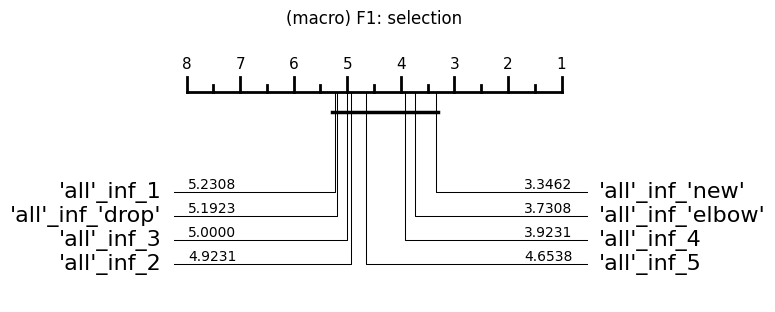

In [74]:
#n_features_strategy

df["group"] = df[["selection", "n_shapelets", "n_features_strategy"]].apply(lambda x: "_".join([f'{_x.strip()}' for _x in x]), axis=1)

df_aeon = df[(df.scaler.isin(['None', 'MinMaxScaler', 'StandardScaler'])) & (df.group.apply(lambda x: 'inf' in x)) & (df.resulting_max_depth_test > 1)]\
                .sort_values(by=["dataset", "method", 'f1_macro_val',], ascending=False)\
                .groupby(["only_dataset", "group", 'selection']).head(1)

df_aeon = df_aeon.pivot(index=['only_dataset'], columns=['group'], values='f1_macro_test')

display(df_aeon.T.sort_index())

df_aeon.dropna(inplace=True)

plot_critical_difference(df_aeon.values, labels=df_aeon.columns, lower_better=False, alpha=.1, test='nemenyi')
plt.title('(macro) F1: selection')
plt.show()